# 🧹 Task 1: Data Cleaning & Preprocessing
**Name:** Dharshini P  
**Date:** 23/06/2025  
**Objective:**  
Clean and prepare the Titanic dataset for machine learning by handling missing values, encoding categorical features, scaling numerical data, and removing outliers.

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load Dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 Step 3: Explore the Data
Understanding the structure and missing values before we begin cleaning.

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 🧼 Step 4: Handle Missing Values
- Fill missing Age with median  
- Fill missing Embarked with mode  
- Drop Cabin column (too many missing values)

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

/tmp/ipython-input-4-3046717843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4-3046717843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## 🔤 Step 5: Encode Categorical Features
Convert 'Sex' and 'Embarked' into numerical columns using one-hot encoding.

In [5]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## ⚖️ Step 6: Normalize Numerical Features
We'll standardize Age and Fare so they're on the same scale.

In [6]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

## 📊 Step 7: Visualize and Remove Outliers
Use boxplots to spot outliers and the IQR method to remove them.

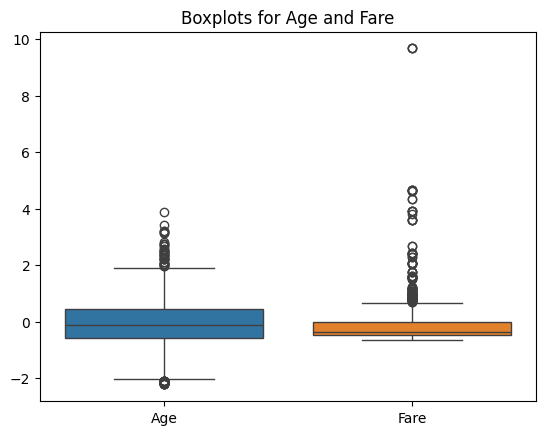

In [7]:
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplots for Age and Fare')
plt.show()

# Remove outliers using IQR
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) |
          (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

## ✅ Final Output
Let's check our cleaned dataset and make sure it's ready for ML.

In [8]:
print("✅ Data cleaned and ready for machine learning!")
df.head()
df.isnull().sum()

✅ Data cleaned and ready for machine learning!


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Sex_male,0


## 📌 Summary

I, **Dharshini P**, have successfully cleaned and preprocessed the Titanic dataset by:
- Handling missing values with median and mode
- Dropping unhelpful columns like Cabin
- Converting categorical features into numerical format
- Normalizing Age and Fare
- Removing outliers using the IQR method

The dataset is now clean, balanced, and ready for machine learning models. 🚀